# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
df['APGAR5'].describe()

count    26925.000000
mean         9.179164
std          0.790574
min          0.000000
25%          9.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: APGAR5, dtype: float64

In [5]:
df['APGAR5'].isnull().sum()

103

In [6]:
df.dropna(subset=['APGAR5'], inplace=True)

In [7]:
df['APGAR5'].isnull().sum()

0

#### 3) Categorizando a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [8]:
df['APGAR5'].value_counts()

APGAR5
9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: count, dtype: int64

In [9]:
df['APGAR5'] = df['APGAR5'].map({

    0: 'asfixia grave',
    1: 'asfixia grave',
    2: 'asfixia grave',
    3: 'asfixia grave',
    4: 'asfixia moderada',
    5: 'asfixia moderada',
    6: 'asfixia leve',
    7: 'asfixia leve',
    8: 'normal',
    9: 'normal',
    10: 'normal'    
    
})

df['APGAR5'].value_counts()

APGAR5
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 2) Gráfico comparando a distribuição de APGAR5 por SEXO para cada grupo de tempo de gestação (GESTACAO).

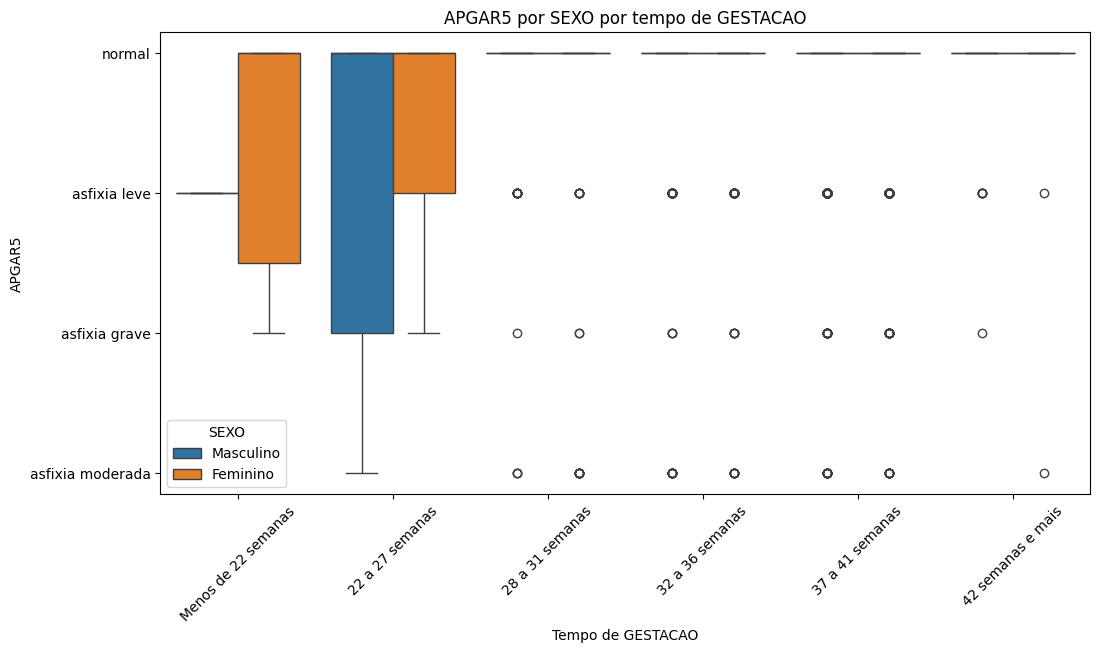

In [10]:
plt.figure(figsize=(12, 6))

ordered_gestacao = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

sns.boxplot(data=df, x='GESTACAO', y='APGAR5', hue='SEXO', order=ordered_gestacao)
plt.xlabel('Tempo de GESTACAO')
plt.ylabel('APGAR5')
plt.title('APGAR5 por SEXO por tempo de GESTACAO')
plt.xticks(rotation=45)

plt.show()


####  4) Tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Calculando os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [12]:
freq_percentl = freq.div(freq.sum(axis=1), axis=0)
freq_percentl

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


In [13]:
freq_percentl.sum(axis=1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Analisando e o gráfico do APGAR5 com o período de gestação. 

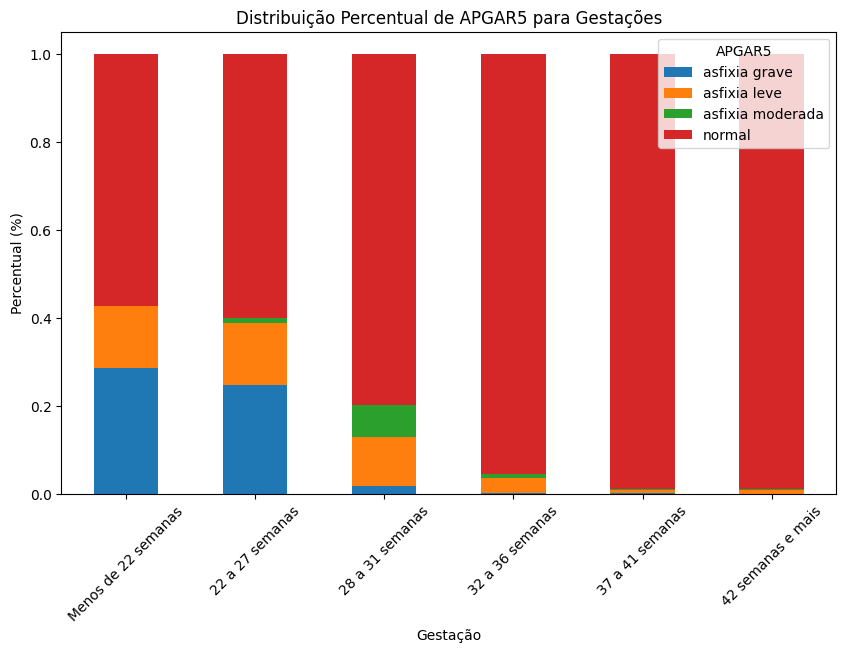

In [14]:
freq_percentl_ordered = freq_percentl.reindex(ordered_gestacao, fill_value=0)

freq_percentl_ordered.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição Percentual de APGAR5 para Gestações')
plt.ylabel('Percentual (%)')
plt.xlabel('Gestação')
plt.xticks(rotation=45)

plt.show()

Observa-se que, à medida que a gestação se aproxima das 37 semanas, a proporção de bebês com classificação normal no APGAR5 aumenta consideravelmente. Já nas gestações mais curtas (22 a 31 semanas), há uma proporção maior de casos de asfixia grave e moderada.

#### 7) Tabela cruzada com APGAR5 nas colunas e PESO nas linhas. Calculando os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada faixa de peso.

In [15]:
freq2 = pd.crosstab(df['PESO'], df['APGAR5'])
freq2

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
PESO,,,,
258,0,0,0,1
285,0,0,0,1
292,0,0,0,1
295,0,0,0,1
305,0,0,0,1
...,...,...,...,...
5190,0,0,0,1
5470,0,0,0,1
5480,0,0,0,1


In [16]:
freq_percentl2 = freq.div(freq.sum(axis=1), axis=0)
freq_percentl2

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


In [17]:
freq_percentl2.sum(axis=1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

#### 8) Veja se há relação entre APGAR5 e o peso do bebê.

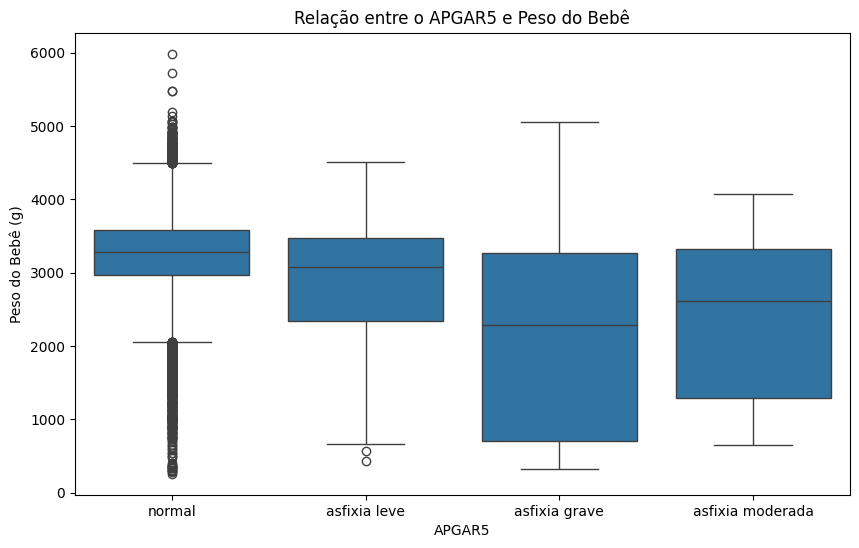

In [18]:
freq_percentl_ordered2 = freq_percentl2.reindex(ordered_gestacao, fill_value=0)
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='APGAR5', y='PESO')
plt.title('Relação entre o APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')

plt.show()


Há uma relação visível entre peso baixo e pontuações de APGAR5 baixas. Bebês com peso inferior a 2500g tendem a ter pontuações de APGAR5 menores, o que pode estar associado a complicações ao nascer. No entanto, bebês com peso adequado (acima de 2500g) apresentam uma maior probabilidade de ter APGAR5 elevado, refletindo boas condições de saúde.